In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/계량/BM_EV.csv')
df.columns = ['date', 'BM_price', 'BM_month_rate', 'Tesla_price', 'Tesla_rate', 'GM_price',
              'GM_rate', 'BYD_price', 'BYD_rate', 'Fox_price', 'Fox_rate']
df.head()

,date,BM_price,BM_month_rate,Tesla_price,Tesla_rate,GM_price,GM_rate,BYD_price,BYD_rate,Fox_price,Fox_rate
0,2020.11.1,37303,0.116475,189.20,0.217717,43.84,-0.051485,172.15,0.121037,141.34,0.075472
1,2020.12.1,41911,0.075814,235.22,0.117358,41.64,0.196470,194.30,0.239985,152.42,0.026033
2,2021.1.1,45212,-0.122758,264.51,-0.161023,50.68,0.012744,247.00,-0.224815,156.44,0.100735
3,2021.2.1,39989,0.004292,225.17,-0.011300,51.33,0.112814,197.27,-0.181602,173.02,0.321381
4,2021.3.1,40161,0.104770,222.64,0.060308,57.46,-0.004186,164.51,-0.036775,238.60,-0.096275


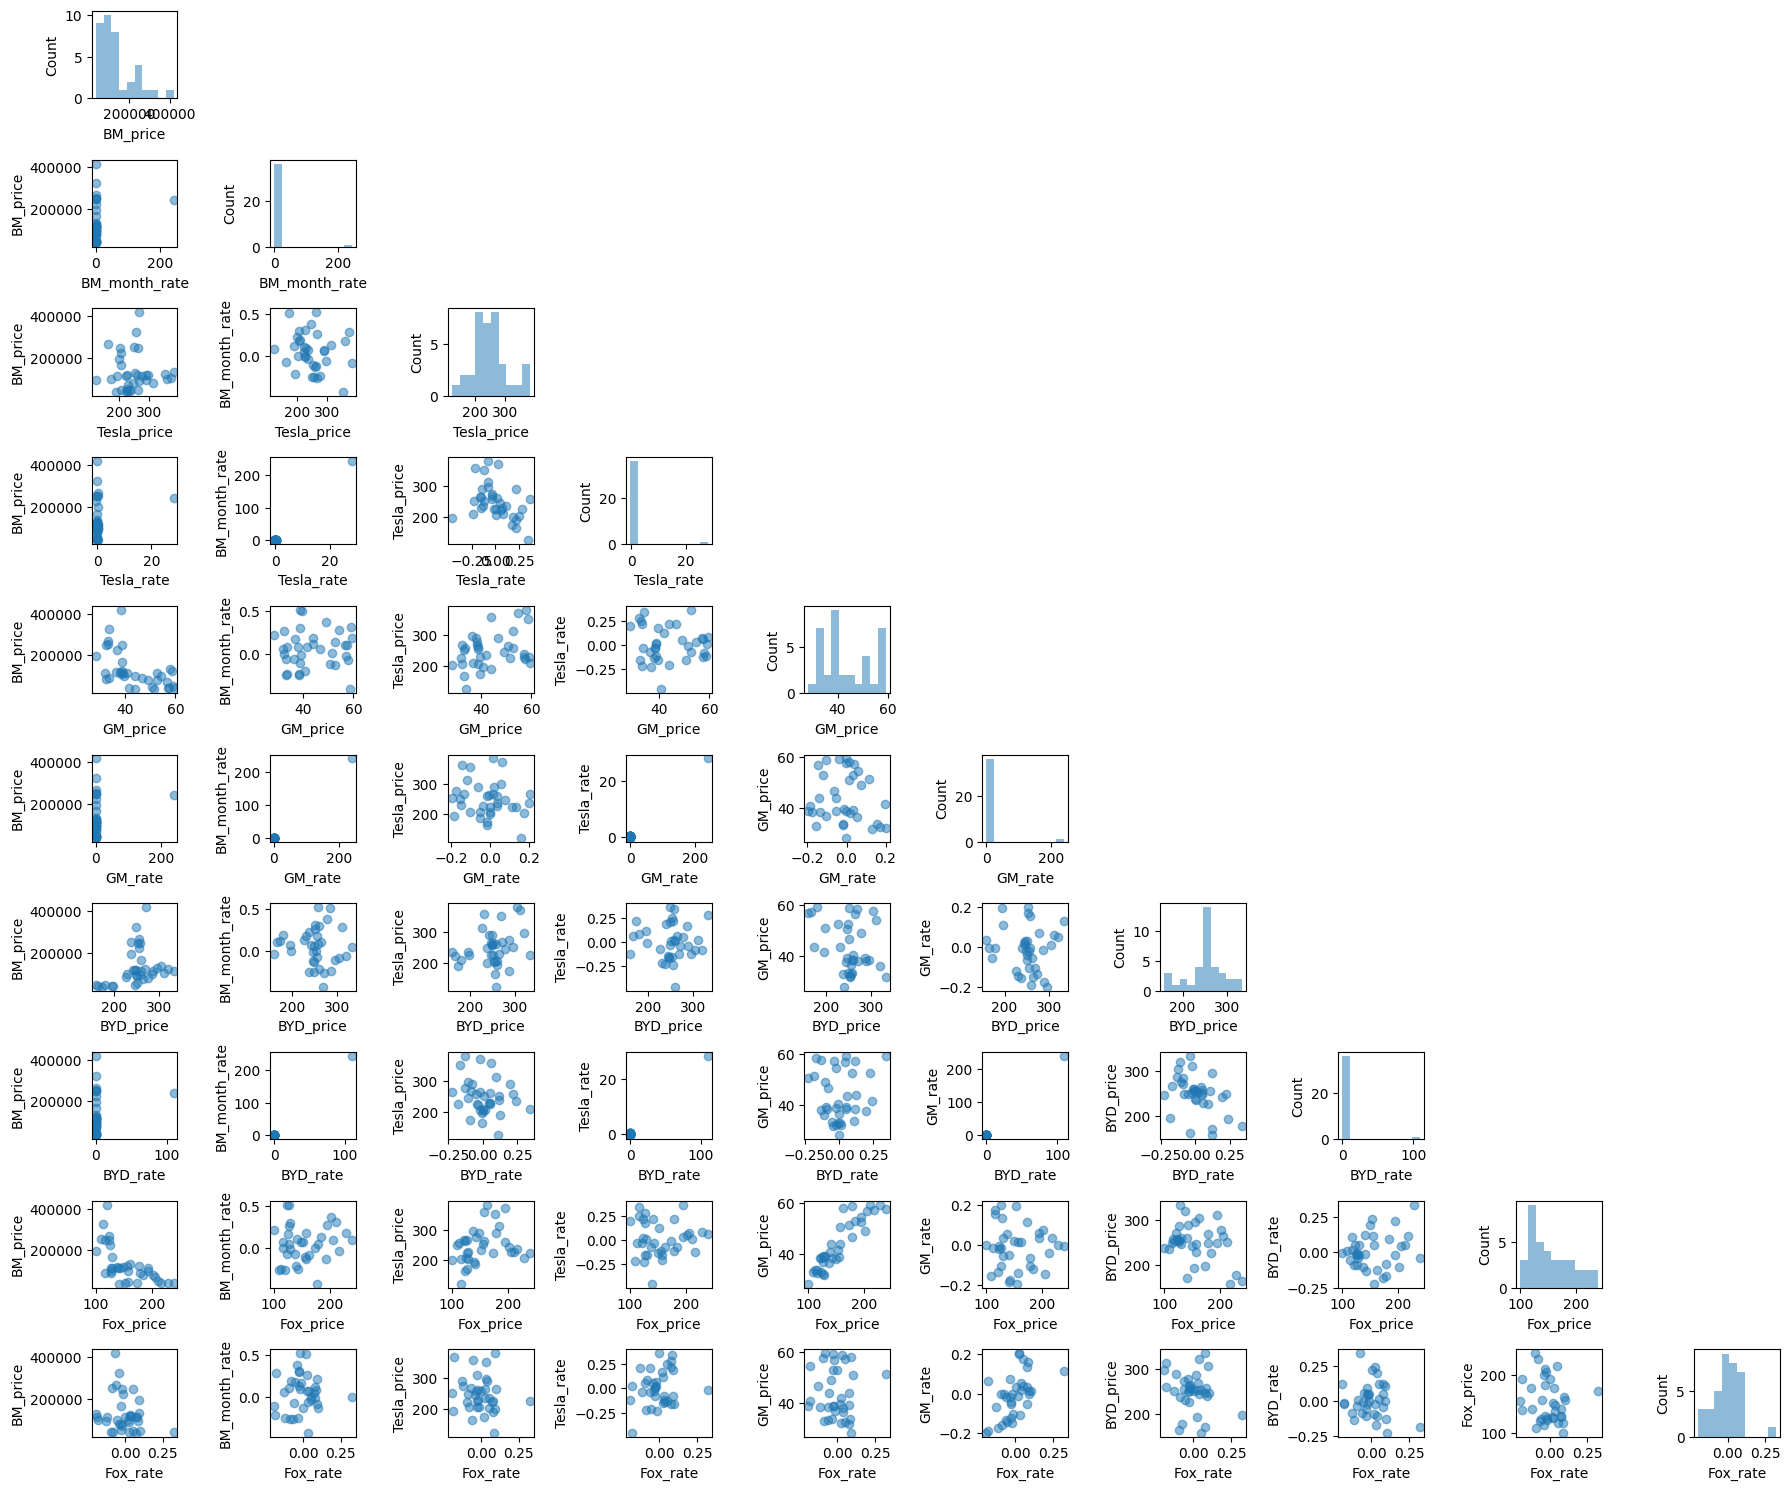

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['BM_price', 'BM_month_rate', 'Tesla_price', 'Tesla_rate', 'GM_price',
              'GM_rate', 'BYD_price', 'BYD_rate', 'Fox_price', 'Fox_rate']
scatterplotmatrix(df[cols].values, figsize=(18,15), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

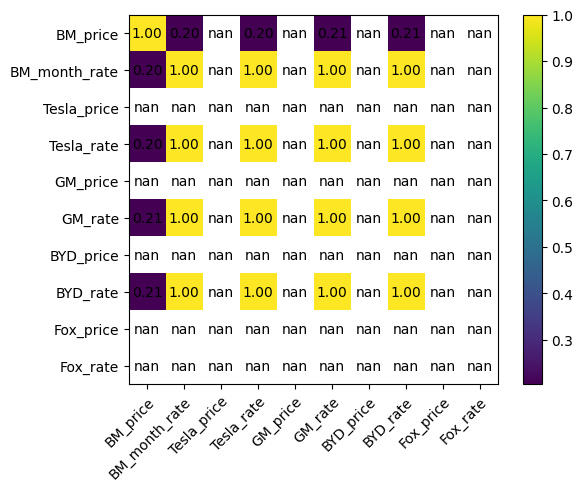

In [ ]:
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.utils import shuffle
# Gradient Descent

class LinearRegressionGD(object):

  def __init__(self, eta=0.0001, n_iter=20):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  def predict(self, X):
    return self.net_input(X)

In [ ]:
X = df['BM_month_rate'].values
y = df['Tesla_rate'].values
X = X.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_x.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

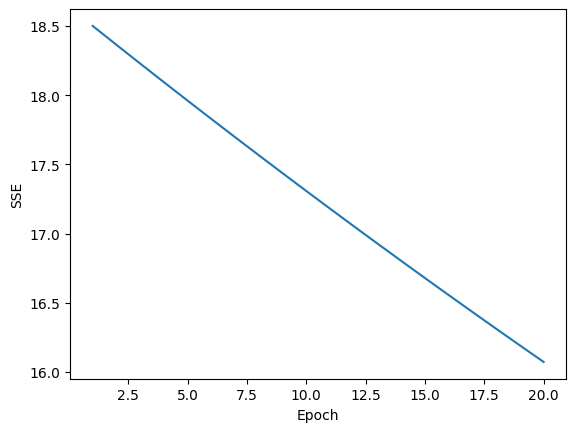

In [ ]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout
plt.show()

In [ ]:
def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return None

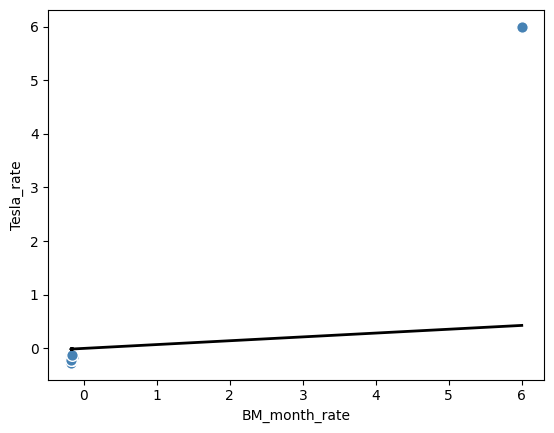

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('BM_month_rate')
plt.ylabel('Tesla_rate')
plt.show()